In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [807]:
trdt = pd.read_csv('train.csv')
tstdt= pd.read_csv('test.csv')

trdt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [808]:
tstdt.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Text(0.5, 1.0, 'Cantidad de Sobrevivientes')

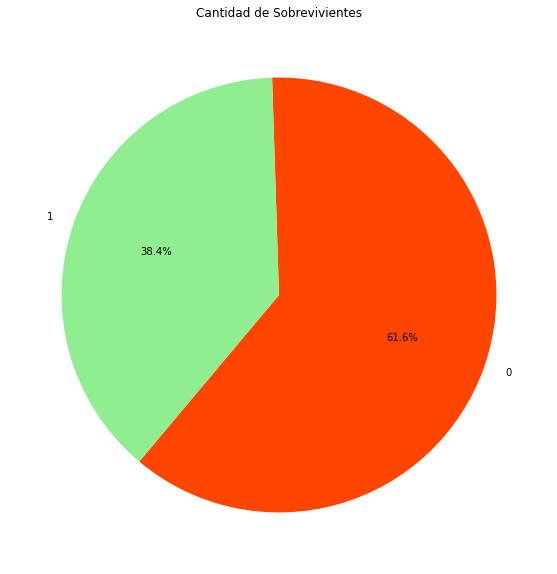

In [812]:
plt.figure(figsize=(10, 10))
plt.pie(trdt['Survived'].value_counts(), labels = trdt['Survived'].value_counts().index , autopct='%1.1f%%', startangle=230, colors=['OrangeRed','lightgreen'])
plt.title('Cantidad de Sobrevivientes')

In [745]:
pd.DataFrame(trdt['Sex'].value_counts())

,Sex
male,577
female,314


C:\Users\israe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

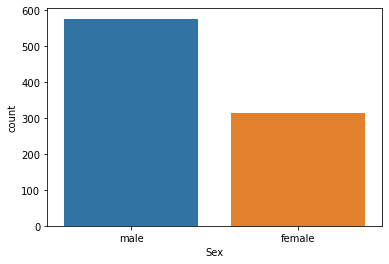

In [746]:
sns.countplot('Sex', data=trdt)

In [815]:
surv_sex = trdt.groupby('Sex')['Survived'].value_counts()
surv_sex

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\israe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seaborn')

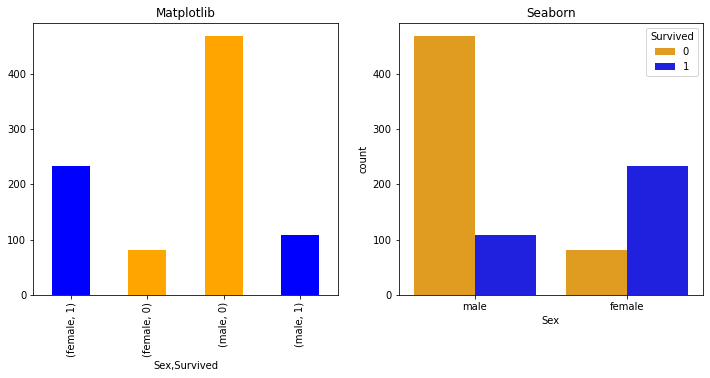

In [831]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
surv_sex.plot(kind='bar', color = ['blue', 'orange', 'orange', 'blue'], ax=axes[0])
axes[0].set_title('Matplotlib')
sns.countplot('Sex', hue='Survived', data=trdt, palette=['orange', 'blue'], ax=axes[1])
axes[1].set_title('Seaborn')

([<matplotlib.patches.Wedge at 0x23c05862d60>,
 [Text(0.7492048113590657, 0.8054142726798595, "('female', 1)"),
  Text(-0.3853189922625739, 1.0303054276289894, "('female', 0)"),
  Text(-0.8249425748237365, -0.7276467193928549, "('male', 0)"),
  Text(1.0197569014785908, -0.4124267957914276, "('male', 1)")],
 [Text(0.4086571698322176, 0.43931687600719604, '26.2%'),
  Text(-0.21017399577958573, 0.5619847787067215, '9.1%'),
  Text(-0.44996867717658345, -0.3968982105779208, '52.5%'),
  Text(0.5562310371701403, -0.22496007043168775, '12.2%')])

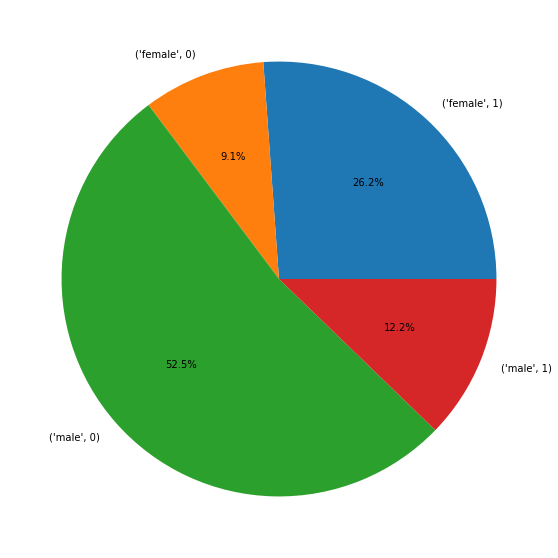

In [827]:
plt.figure(figsize=(10,10))
plt.pie(surv_sex, labels = surv_sex.index, autopct='%1.1f%%')

<AxesSubplot:>

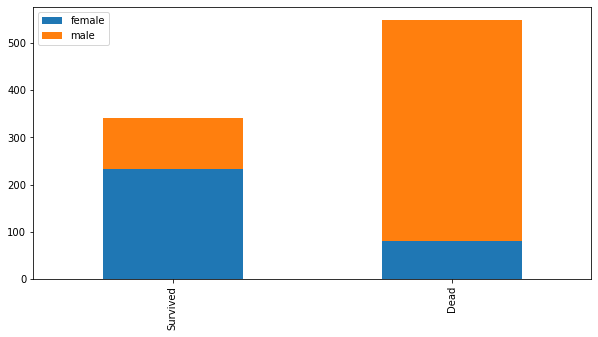

In [838]:
dead = trdt[ trdt['Survived']==0]['Sex'].value_counts()
surv = trdt[trdt['Survived']==1]['Sex'].value_counts()
df_ss = pd.DataFrame([surv,dead])
df_ss.index = ['Survived', 'Dead']
df_ss.plot(kind='bar', stacked=True, figsize=(10,5))

In [839]:
cs = pd.DataFrame(trdt.groupby('Pclass')['Survived'].value_counts())
cs

Survived
Pclass Survived          
1      1              136
       0               80
2      0               97
       1               87
3      0              372
       1              119

<AxesSubplot:>

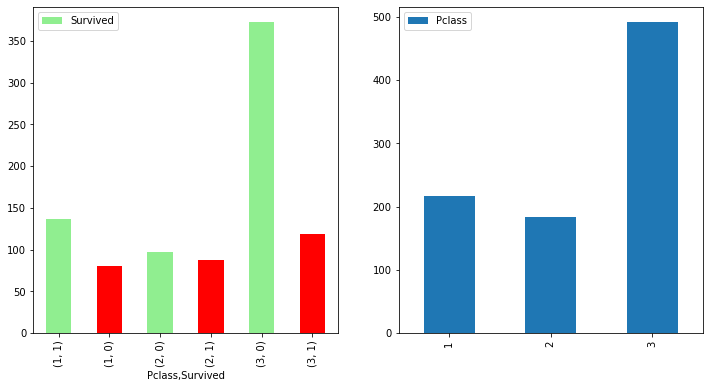

In [841]:
pc = pd.DataFrame(trdt['Pclass'].value_counts())
pc = pc.sort_index(ascending=True)

fig, axes = plt.subplots(1,2,figsize=(12,6))
cs.plot(kind='bar', color=[('lightgreen', 'red')], ax = axes[0])
pc.plot(kind='bar', ax = axes[1])

C:\Users\israe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')]

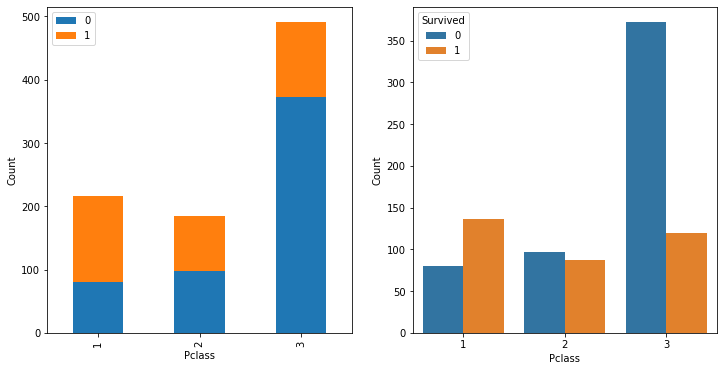

In [842]:
pclass1 = trdt[trdt['Pclass']==1]['Survived'].value_counts() 
pclass2 = trdt[trdt['Pclass']==2]['Survived'].value_counts()
pclass3 = trdt[trdt['Pclass']==3]['Survived'].value_counts()
psd=pd.DataFrame([pclass1, pclass2, pclass3])

fig, axes = plt.subplots(1,2, figsize=(12,6))
psd.plot(kind='bar',stacked=True, ax = axes[0])
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Pclass')
axes[0].set_xticklabels(['1', '2', '3'])

sns.countplot('Pclass', hue='Survived', data = trdt, ax = axes[1])
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Pclass')
axes[1].set_xticklabels(['1', '2', '3'])

C:\Users\israe\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\israe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\israe\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:

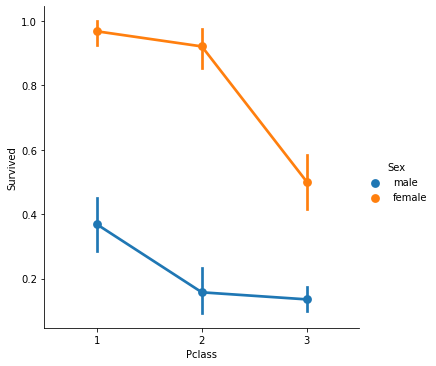

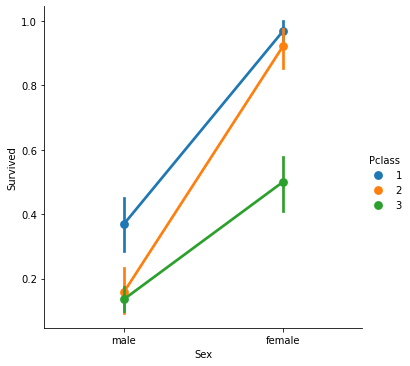

In [843]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = trdt)
sns.factorplot('Sex', 'Survived', hue='Pclass', data = trdt)

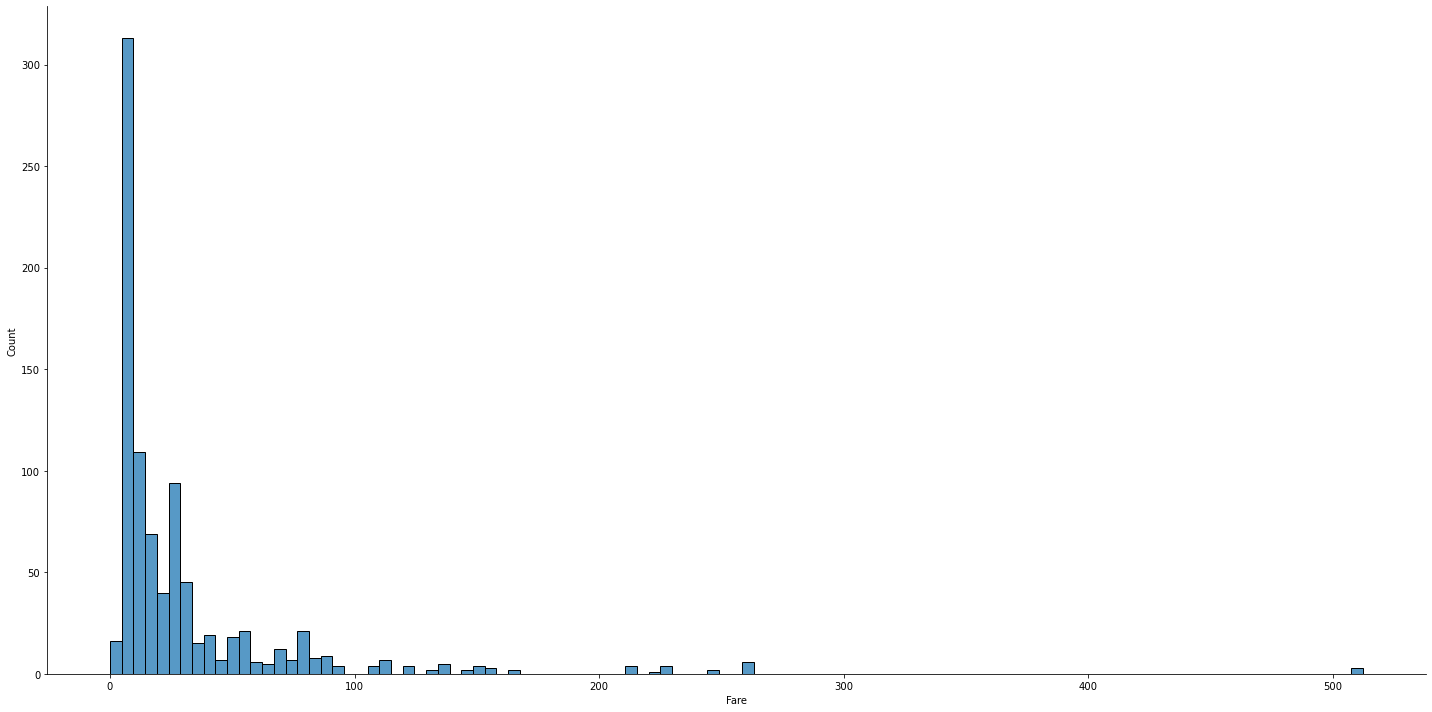

In [844]:
sns.displot(data=trdt, x='Fare', height=10, aspect=2)

In [847]:
min_fare=trdt['Fare'].min()
max_fare=trdt['Fare'].max()
mean_fare=trdt['Fare'].mean()
min_fare, max_fare, mean_fare

(0.0, 512.3292, 32.2042079685746)

C:\Users\israe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\israe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\israe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0, 0.5, ' ')

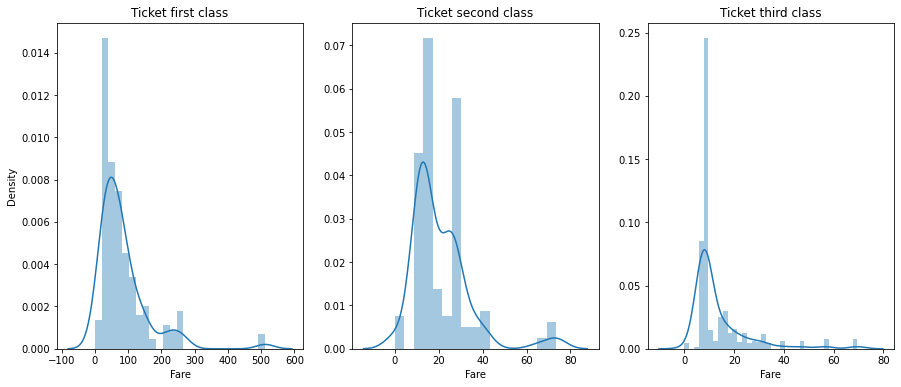

In [846]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

sns.distplot( trdt[trdt['Pclass']==1]['Fare'], ax=axes[0])
axes[0].set_title('Ticket first class')

sns.distplot( trdt[trdt['Pclass']==2]['Fare'], ax=axes[1])
axes[1].set_title('Ticket second class')
axes[1].set_ylabel(' ')

sns.distplot( trdt[trdt['Pclass']==3]['Fare'], ax=axes[2])
axes[2].set_title('Ticket third class') 
axes[2].set_ylabel(' ')

In [848]:
fc1 = trdt[trdt['Pclass']==1]['Fare'].mean()
fc2 = trdt[trdt['Pclass']==2]['Fare'].mean()
fc3 = trdt[trdt['Pclass']==3]['Fare'].mean()
fc1, fc2, fc3

(84.15468749999992, 20.66218315217391, 13.675550101832997)

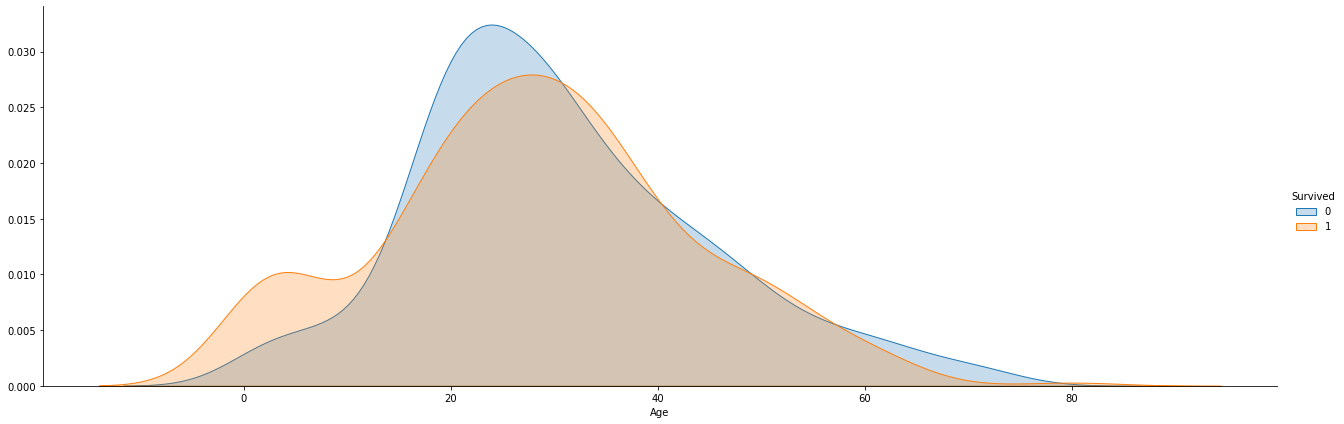

In [849]:
ages_surv = sns.FacetGrid(trdt, hue='Survived', height=6, aspect=3)
ages_surv.map(sns.kdeplot, 'Age', shade=True)
ages_surv.add_legend()

In [850]:
trdt['age_range']=0
trdt.loc[trdt['Age']<= 17, 'age_range']=0 #De 0 a 17 años
trdt.loc[(trdt['Age']>17) & (trdt['Age']<=35), 'age_range']=1 #De 18 a 35 años
trdt.loc[(trdt['Age']>35) & (trdt['Age']<=50), 'age_range']=2 #De 36 a 50 años
trdt.loc[(trdt['Age']>50) & (trdt['Age']<=65), 'age_range']=3 #De 51 a 65 años
trdt.loc[trdt['Age']>65, 'age_range']=4 #Mayores de 65 años
trdt['age_range'].value_counts()

1    384
0    290
2    153
3     56
4      8
Name: age_range, dtype: int64

In [851]:
trdt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


Text(0.5, 0.98, 'Distribución de las edades')

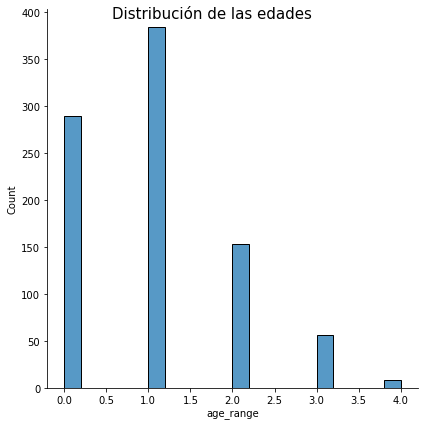

In [852]:
barras_edades = sns.displot(data=trdt, x='age_range', height=6, aspect=1)
barras_edades.fig.suptitle('Distribución de las edades', fontsize=15)

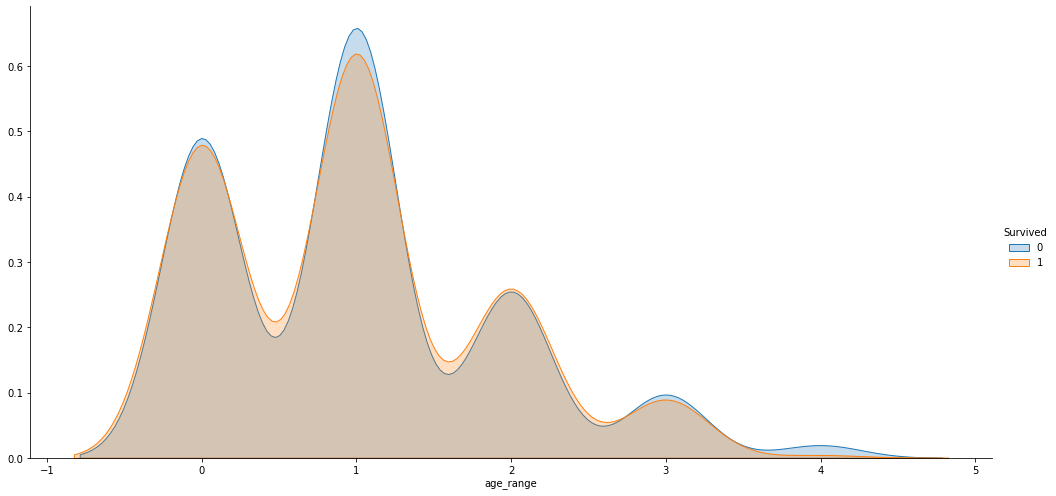

In [853]:
curvs = sns.FacetGrid(trdt, hue='Survived', height=7, aspect=2)
curvs.map(sns.kdeplot, 'age_range', shade=True)
curvs.add_legend()

In [854]:
trdt['fare_category']=0
trdt.loc[trdt['Fare']<= 7.91, 'fare_category']=0
trdt.loc[(trdt['Fare']>7.91) & (trdt['Fare']<=14.454), 'fare_category']=1
trdt.loc[(trdt['Fare']>14.454) & (trdt['Fare']<=31.0), 'fare_category']=2
trdt.loc[(trdt['Fare']>31.0) & (trdt['Fare']<=512.329), 'fare_category']=3

In [855]:
trdt['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [856]:
trdt['Embarked'].replace(['S','C','Q'], ['0','1','2'], inplace=True)

In [857]:
trdt=trdt.drop(['Name','Age', 'Fare', 'Cabin', 'Ticket'], axis=1)

In [858]:
trdt

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,age_range,fare_category
0,1,0,3,0,1,0,0,1,0
1,2,1,1,1,1,0,1,2,3
2,3,1,3,1,0,0,0,1,1
3,4,1,1,1,1,0,0,1,3
4,5,0,3,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,0,1,1
887,888,1,1,1,0,0,0,1,2
888,889,0,3,1,1,2,0,0,2
889,890,1,1,0,0,0,1,1,2


In [859]:
train=trdt.copy()

In [860]:
target=trdt['Survived']

In [861]:
train['Embarked'].fillna(0, inplace=True)

In [862]:
train.isnull().value_counts()
train = train.drop('PassengerId', axis=1)

In [863]:
train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,age_range,fare_category
0,0,3,0,1,0,0,1,0
1,1,1,1,1,0,1,2,3
2,1,3,1,0,0,0,1,1
3,1,1,1,1,0,0,1,3
4,0,3,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,1
887,1,1,1,0,0,0,1,2
888,0,3,1,1,2,0,0,2
889,1,1,0,0,0,1,1,2


In [865]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [868]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.96666667 0.94382022 0.93258427 0.98876404 0.94382022 0.95505618
 0.96629213 0.95505618 0.95505618 1.        ]


In [869]:
clf.fit(train, target)

KNeighborsClassifier(n_neighbors=13)

## Ahora limpiemos los datos del test

In [870]:
tstdt['fare_category']=0
tstdt.loc[tstdt['Fare']<7.91, 'fare_category']=0
tstdt.loc[(tstdt['Fare']> 7.91) & (tstdt['Fare']<=14.454), 'fare_category']=1 
tstdt.loc[(tstdt['Fare']>14.454) & (tstdt['Fare']<=31.0), 'fare_category']=2
tstdt.loc[(tstdt['Fare']>31.0) & (tstdt['Fare']<=512.329), 'fare_category']=3
tstdt['fare_category'].value_counts()

tstdt['age_range']=0
tstdt.loc[tstdt['Age']<= 17, 'age_range']=0 #De 0 a 17 años
tstdt.loc[(tstdt['Age']>17) & (tstdt['Age']<=35), 'age_range']=1 #De 18 a 35 años
tstdt.loc[(tstdt['Age']>35) & (tstdt['Age']<=50), 'age_range']=2 #De 36 a 50 años
tstdt.loc[(tstdt['Age']>50) & (tstdt['Age']<=65), 'age_range']=3 #De 51 a 65 años
tstdt.loc[tstdt['Age']>65, 'age_range']=4 #Mayores de 65 años
tstdt['age_range'].value_counts(ascending=True)

4      2
3     29
2     74
0    127
1    186
Name: age_range, dtype: int64

In [871]:
test = tstdt.copy()

In [872]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'],axis=1)

In [873]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,fare_category,age_range
0,3,male,34.5,0,0,Q,0,1
1,3,female,47.0,1,0,S,0,2
2,2,male,62.0,0,0,Q,1,3
3,3,male,27.0,0,0,S,1,1
4,3,female,22.0,1,1,S,1,1
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,S,1,0
414,1,female,39.0,0,0,C,3,2
415,3,male,38.5,0,0,S,0,2
416,3,male,NaN,0,0,S,1,0


In [874]:
test['Embarked'].replace(['S','C','Q'], ['0','1','2'], inplace=True)
test['Sex'].replace(['male', 'female'], [0,1], inplace=True)

In [875]:
test = test.drop('Age',axis=1)

In [876]:
train=train.drop('Survived',axis=1)

# Ahora finalmente, usamos KNeighbrs para predecir los valores de Survived!!!

In [891]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring).mean()
print(score)
clf.fit(train, target)

0.8058676654182271


KNeighborsClassifier(n_neighbors=13)

In [880]:
train

,Pclass,Sex,SibSp,Parch,Embarked,age_range,fare_category
0,3,0,1,0,0,1,0
1,1,1,1,0,1,2,3
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,3
4,3,0,0,0,0,1,1
...,...,...,...,...,...,...,...
886,2,0,0,0,0,1,1
887,1,1,0,0,0,1,2
888,3,1,1,2,0,0,2
889,1,0,0,0,1,1,2


In [881]:
test

,Pclass,Sex,SibSp,Parch,Embarked,fare_category,age_range
0,3,0,0,0,2,0,1
1,3,1,1,0,0,0,2
2,2,0,0,0,2,1,3
3,3,0,0,0,0,1,1
4,3,1,1,1,0,1,1
...,...,...,...,...,...,...,...
413,3,0,0,0,0,1,0
414,1,1,0,0,1,3,2
415,3,0,0,0,0,0,2
416,3,0,0,0,0,1,0


In [882]:
clf.predict(test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [883]:
test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [884]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [886]:
test.isnull().value_counts()

Pclass  Sex    SibSp  Parch  Embarked  fare_category  age_range
False   False  False  False  False     False          False        418
dtype: int64

# Ahora utilizemos Decision Tree

In [887]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

In [888]:
clfDT = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.8058676654182271


In [889]:
clfDT.fit(train,target)

DecisionTreeClassifier()

In [890]:
clfDT.predict(test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Ahora con Random Forest

In [798]:
clfRF = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.8058676654182271


In [799]:
clfRF.fit(train, target)

RandomForestClassifier(n_estimators=13)

In [800]:
clfRF.predict(test)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Con Naive Bayes

In [801]:
clfNB = MultinomialNB()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.8058676654182271


In [802]:
clfNB.fit(train, target)

MultinomialNB()

In [804]:
clfNB.predict(test)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,